In [5]:
pip install nilearn

     |████████████████████████████████| 9.6 MB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 18.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
###9.1.1

# import numpy: the module providing numerical arrays
import numpy as np
t = np.linspace(1, 10, 2000)

## linspace: ici 2000 points à égale distance entre 1 et 10

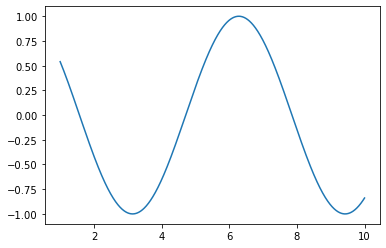

In [3]:
# import matplotlib.pyplot: the module for scientific plotting
import matplotlib.pyplot as plt
plt.plot(t, np.cos(t))


In [4]:
###9.1.2

# Let us use a Nifti file that is shipped with nilearn
from nilearn.datasets import MNI152_FILE_PATH

# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print('Path to MNI152 template: %r' % MNI152_FILE_PATH)

Path to MNI152 template: '/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/datasets/data/mni_icbm152_t1_tal_nlin_sym_09a_converted.nii.gz'


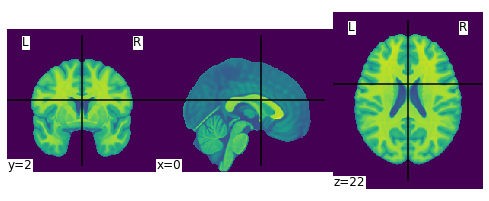

In [5]:
### fonction la plus basique pour plot

from nilearn import plotting
plotting.plot_img(MNI152_FILE_PATH)

In [6]:
from nilearn import image
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)

# While we are giving a file name as input, the function returns
# an in-memory object:
smooth_anat_img

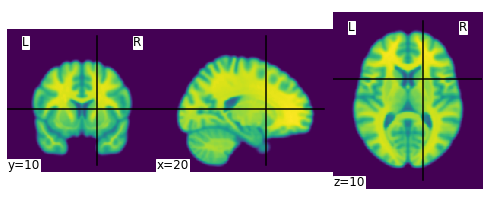

In [7]:
### l'affichage en mode ortho permet d'entrer des coordonnées pour voir des régions précises
plotting.plot_img(smooth_anat_img, display_mode = 'ortho', cut_coords=(20, 10, 10))

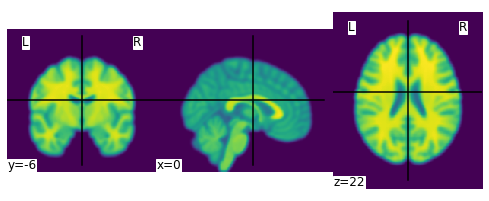

In [8]:
### on refait passer le smooth dans une fonction de smooth
more_smooth_anat_img = image.smooth_img(smooth_anat_img, fwhm=3)
plotting.plot_img(more_smooth_anat_img)

In [9]:
### pour sauvegarder l'image
more_smooth_anat_img.to_filename('more_smooth_anat_img.nii.gz')

In [10]:
### pour plot en dehors de python
plotting.show()

In [11]:
### 9.1.3

#stockage des satasets de test
from nilearn import datasets
print('Datasets are stored in: %r' % datasets.get_data_dirs())

Datasets are stored in: ['/home/pierre/nilearn_data']


In [12]:
motor_images = datasets.fetch_neurovault_motor_task()
motor_images.images

['/home/pierre/nilearn_data/neurovault/collection_658/image_10426.nii.gz']

In [13]:
tmap_filename = motor_images.images[0]

/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


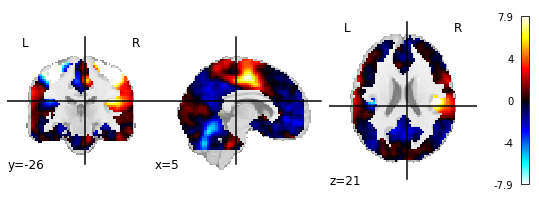

In [14]:
from nilearn import plotting
plotting.plot_stat_map(tmap_filename)

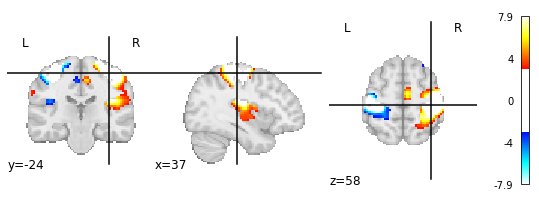

In [15]:
plotting.plot_stat_map(tmap_filename, threshold=3) # plus visible avec un threshold

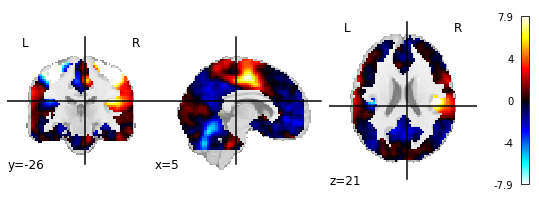

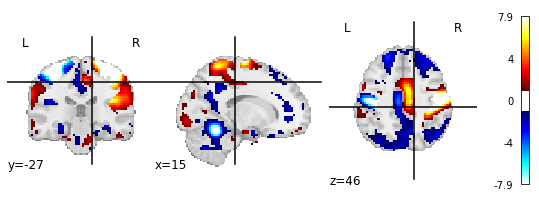

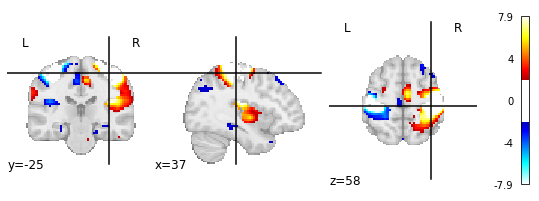

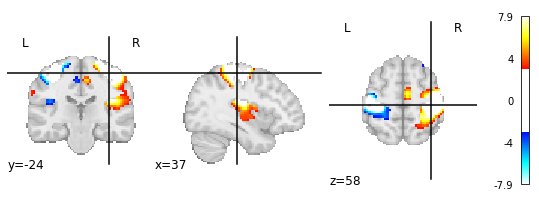

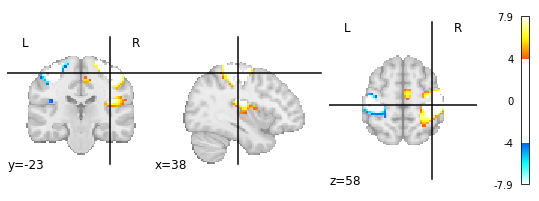

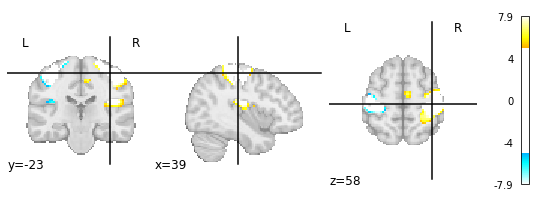

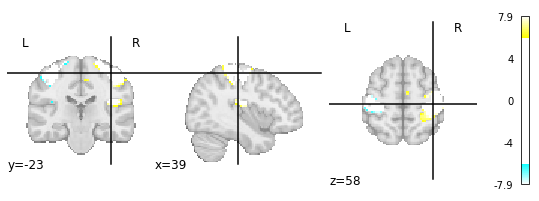

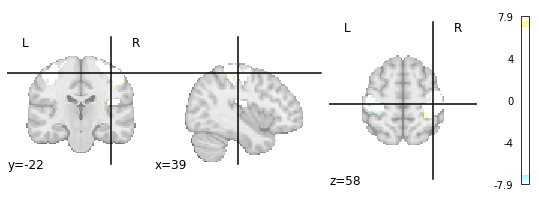

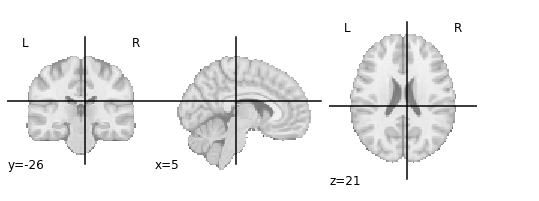

In [18]:
for i in range (0, 9):
    plotting.plot_stat_map(tmap_filename, threshold=i) # comparaison de l'effet de différents threshold

In [17]:
# donnée 4D
rsn = datasets.fetch_atlas_smith_2009()['rsn10']
rsn

'/home/pierre/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz'

In [19]:
from nilearn import image
print(image.load_img(rsn).shape) #quatrième dim = frame = temps (1frame/?)

(91, 109, 91, 10)


In [20]:
first_rsn = image.index_img(rsn, 0) ### premier volume
print(first_rsn.shape)

(91, 109, 91)


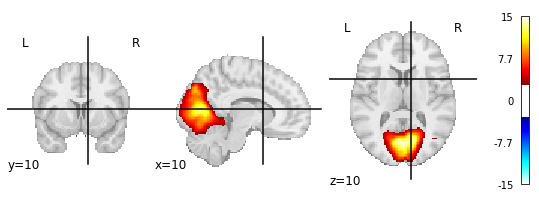

In [23]:
plotting.plot_stat_map(first_rsn, threshold = 3, display_mode = 'ortho', cut_coords=(10, 10, 10))

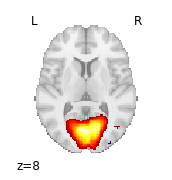

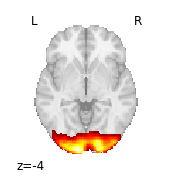

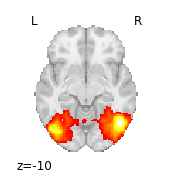

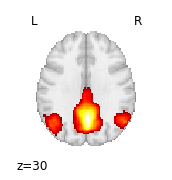

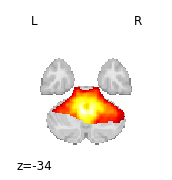

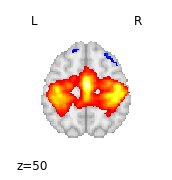

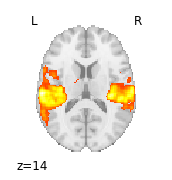

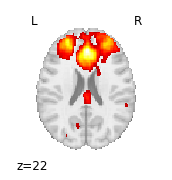

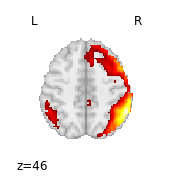

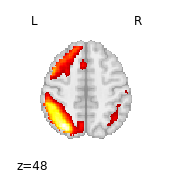

In [24]:
for img in image.iter_img(rsn):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img, threshold=3, display_mode="z", cut_coords=1,
                           colorbar=False)

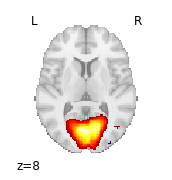

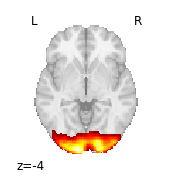

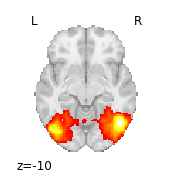

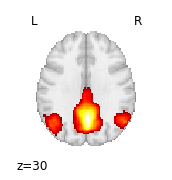

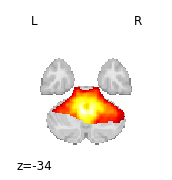

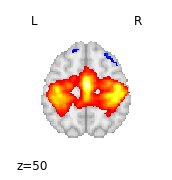

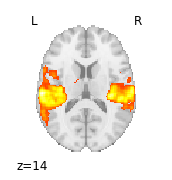

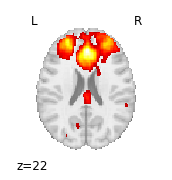

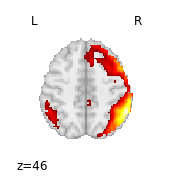

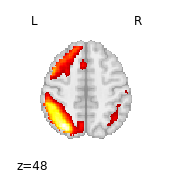

In [42]:
for i in range (image.load_img(rsn).shape[3]):    # img is now an in-memory 3D img
    plotting.plot_stat_map(image.index_img(rsn, i), threshold=3, display_mode="z", cut_coords=1,
                           colorbar=False)
##fonctionnement de iter_img
    

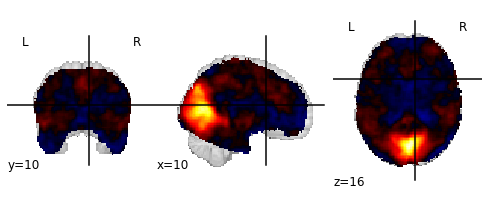

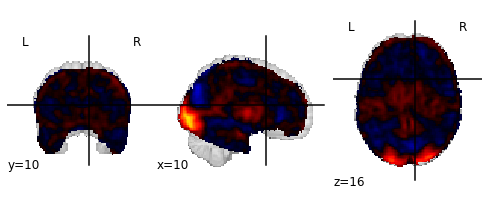

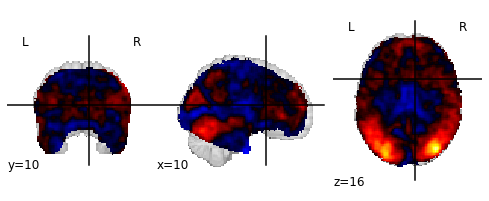

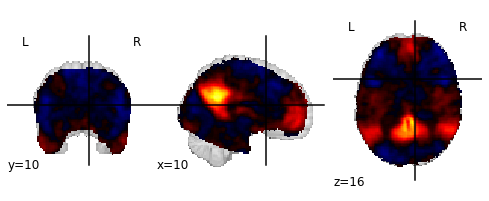

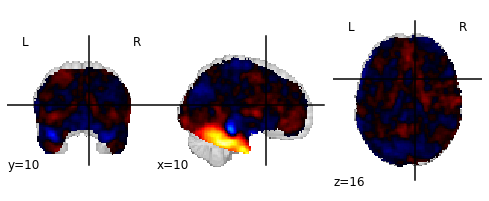

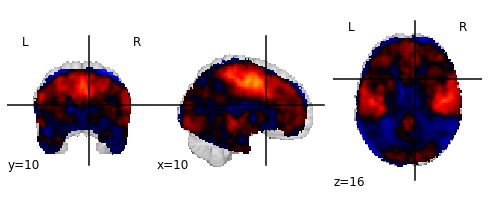

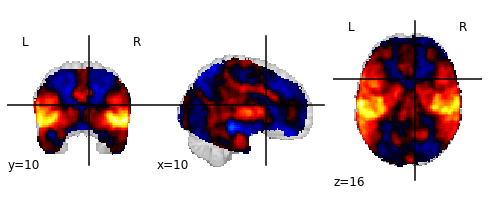

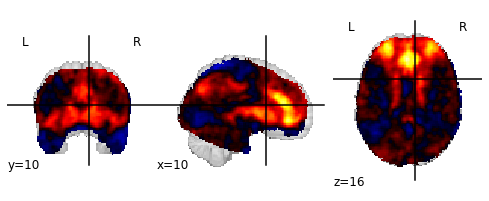

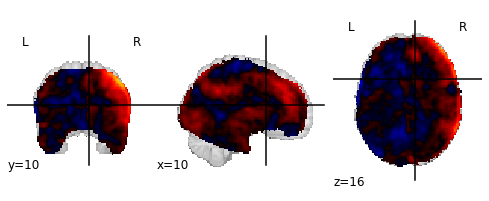

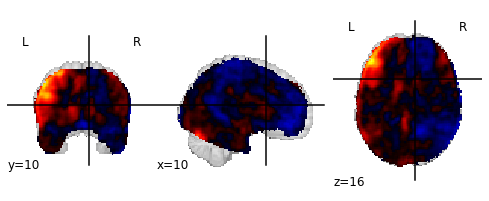

In [49]:
for i in range (image.load_img(rsn).shape[3]):    # img is now an in-memory 3D img
    plotting.plot_stat_map(image.index_img(rsn, i), threshold=0, display_mode = 'ortho', cut_coords=(10, 10, 16),
                           colorbar=False)
## activation au cours des 10 frames?

In [45]:
selected_volumes = image.index_img(rsn, slice(3, 5))

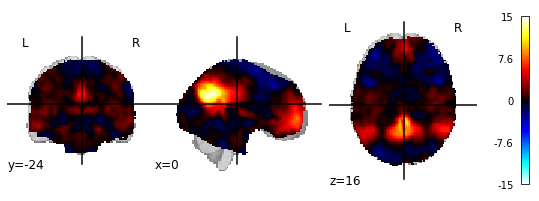

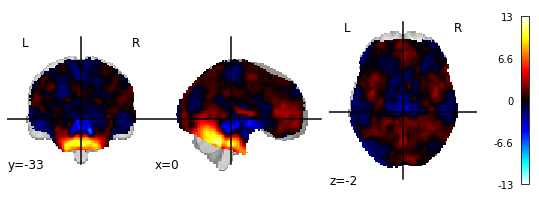

In [46]:
for img in image.iter_img(selected_volumes):
    plotting.plot_stat_map(img)

### la coupe Z correspond au chunk precédent: même processus